In [17]:
import numpy as np
from keras.models import Sequential, load_model, model_from_json, model_from_yaml
from keras.layers import Dense, Dropout, Flatten, Input, Activation, concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.models import Model
import sys
from utils import save_model_viz, save_weights, save_hist, plot_hist


np.random.seed(1234)
RUN_ID = "2"
# RUN_ID = sys.argv[1]

x_train = np.load("npy/x_train" + RUN_ID + ".npy")
y_train = np.load("npy/y_train" + RUN_ID + ".npy")
x_valid = np.load("npy/x_valid" + RUN_ID + ".npy")
y_valid = np.load("npy/y_valid" + RUN_ID + ".npy")

print("x_train:{}, x_valid:{}".format(x_train.shape, x_valid.shape))
print("y_train:{}, y_valid:{}".format(y_train.shape, y_valid.shape))

print("　　縦　　　横　　　チャネル数")
print(x_train.shape[1],x_train.shape[2],x_train.shape[3])

x_train:(245, 460, 460, 2), x_valid:(63, 460, 460, 2)
y_train:(245,), y_valid:(63,)
　　縦　　　横　　　チャネル数
460 460 2


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 458, 458, 16)      304       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 152, 152, 16)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 150, 150, 8)       1160      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 48, 48, 32)        2336      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 22, 22, 32)        9248      
__________

Epoch 45/100
245/245 [==============================] - 21s 84ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0826 - val_acc: 0.9524
Epoch 46/100
245/245 [==============================] - 22s 90ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0790 - val_acc: 0.9524
Epoch 47/100
245/245 [==============================] - 21s 86ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9524
Epoch 48/100
245/245 [==============================] - 19s 78ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0828 - val_acc: 0.9524
Epoch 49/100
245/245 [==============================] - 21s 87ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0853 - val_acc: 0.9524
Epoch 50/100
245/245 [==============================] - 22s 88ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0873 - val_acc: 0.9524
Epoch 51/100
245/245 [==============================] - 21s 86ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0858 - val_acc: 0.9524
Epoch 52/100
245/245 [==========================

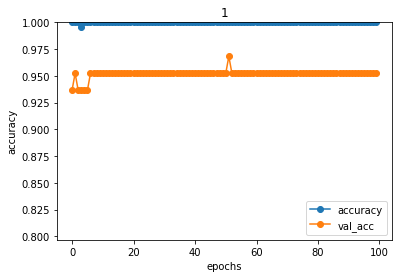

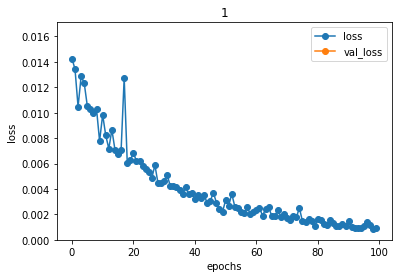

In [13]:
model = model_from_yaml(open('model/-f.yaml').read())
model.load_weights('model/-f_weight.h5')


model.compile(optimizer = Adam(lr=8e-5),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.summary()
save_model_viz(RUN_ID, model)
hist = model.fit(x_train, y_train, epochs=100, batch_size=48,
                 verbose=1, validation_data=(x_valid, y_valid))

save_weights(RUN_ID, model)
save_hist(RUN_ID, hist)
plot_hist(RUN_ID)